In [164]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import numpy as np
import math

In [165]:
# Extract data of the material from the API
with MPRester("TL5oMzFNQZwCXV0W") as m:    
    
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-754555")     
    
    # Data for material id
    data = m.get_data("mp-754555")[0]
  

In [166]:
# Les trois premiers pics sont associés aux plans (111), (100) et (222)
vect1 = [1,1,1]
vect2 = [2,2,2]
vect3 = [1,0,0]

# Paramètre de maille [Å]
a = float(data.get('cif')[94:103])

# Angle entre les axes [°]
alpha = float(data.get('cif')[181:192])*(np.pi/180)

# Longueur d'onde [Å]
Lambda = 1.54060  

# Calculateur pour CuKa1
xrdcalc = XRDCalculator('CuKa1')
pattern = xrdcalc.get_pattern(structure)

In [167]:
# Premier pic
print("Premier pic pour un rayonnement X incident Cu Kα de longueur d’onde λ = 1.54060 Å: \n")

# Distance entre 2 plans de la famille (111)
d_111 = a * (1-(math.cos(alpha))) * ( (1+2*math.cos(alpha)) / ( (vect1[0]**2 + vect1[1]**2 + vect1[2]**2)*(math.sin(alpha))**2 + 2*(vect1[0]*vect1[1] + vect1[1]*vect1[2] + vect1[0]*vect1[2]) * ((math.cos(alpha))**2 - math.cos(alpha)) ) ) ** (1/2) 
print("Distance entre les plans hkl [Å]: {}".format(d_111))

# Angle theta correspondant (obtenu par la loi de Bragg)
theta_111 = np.arcsin(Lambda / (2*d_111)) * 180/np.pi
print("Angle 2θ [°]: {}".format(2*theta_111))

# Indices hkl associés
print("Indices hkl associés: {0}{1}{2}".format(vect1[0], vect1[1], vect1[2]))

# Intensité
intensite1 = pattern.y[0]
print("Intensité du premier pic [%]: {}".format(intensite1))

Premier pic pour un rayonnement X incident Cu Kα de longueur d’onde λ = 1.54060 Å: 

Distance entre les plans hkl [Å]: 6.499355675554433
Angle 2θ [°]: 13.613326002483578
Indices hkl associés: 111
Intensité du premier pic [%]: 0.568744098456523


In [168]:
# Deuxième pic
print("Deuxième pic pour un rayonnement X incident Cu Kα de longueur d’onde λ = 1.54060 Å: \n")

# Distance entre 2 plans de la famille (222)
d_222 = a * (1-(math.cos(alpha))) * ( (1+2*math.cos(alpha)) / ( (vect2[0]**2 + vect2[1]**2 + vect2[2]**2)*(math.sin(alpha))**2 + 2*(vect2[0]*vect2[1] + vect2[1]*vect2[2] + vect2[0]*vect2[2]) * ((math.cos(alpha))**2 - math.cos(alpha)) ) ) ** (1/2)
print("Distance entre les plans hkl [Å]: {}".format(d_222))

# Angle theta correspondant (obtenu par la loi de Bragg)
theta_222 = np.arcsin(Lambda / (2*d_222)) * 180/np.pi
print("Angle 2θ [°]: {}".format(2*theta_222))

# Indices hkl associés
print("Indices hkl associés: {0}{1}{2}".format(vect2[0], vect2[1], vect2[2]))

# Intensité
intensite2 = pattern.y[1]
print("Intensité du deuxième pic [%]: {}".format(intensite2))

Deuxième pic pour un rayonnement X incident Cu Kα de longueur d’onde λ = 1.54060 Å: 

Distance entre les plans hkl [Å]: 3.2496778377772166
Angle 2θ [°]: 27.423676794962613
Indices hkl associés: 222
Intensité du deuxième pic [%]: 48.92252821386597


In [169]:
# Troisième pic
print("Troisième pic pour un rayonnement X incident Cu Kα de longueur d’onde λ = 1.54060 Å: \n")

# Distance entre 2 plans de la famille (100)
d_100 = a * (1-(math.cos(alpha))) * ( (1+2*math.cos(alpha)) / ( (vect3[0]**2 + vect3[1]**2 + vect3[2]**2)*(math.sin(alpha))**2 + 2*(vect3[0]*vect3[1] + vect3[1]*vect3[2] + vect3[0]*vect3[2]) * ((math.cos(alpha))**2 - math.cos(alpha)) ) ) ** (1/2)
print("Distance entre les plans hkl [Å]: {}".format(d_100))

# Angle theta correspondant (obtenu par la loi de Bragg)
theta_100 = np.arcsin(Lambda / (2*d_100)) * 180/np.pi
print("Angle 2θ [°]: {}".format(2*theta_100))

# Indices hkl associés
print("Indices hkl associés: {0}{1}{2}".format(vect3[0], vect3[1], vect3[2]))

# Intensité
intensite3 = pattern.y[2]
print("Intensité du troisième pic [%]: {}".format(intensite1))

Troisième pic pour un rayonnement X incident Cu Kα de longueur d’onde λ = 1.54060 Å: 

Distance entre les plans hkl [Å]: 2.973671717075905
Angle 2θ [°]: 30.026216675656542
Indices hkl associés: 100
Intensité du troisième pic [%]: 0.568744098456523


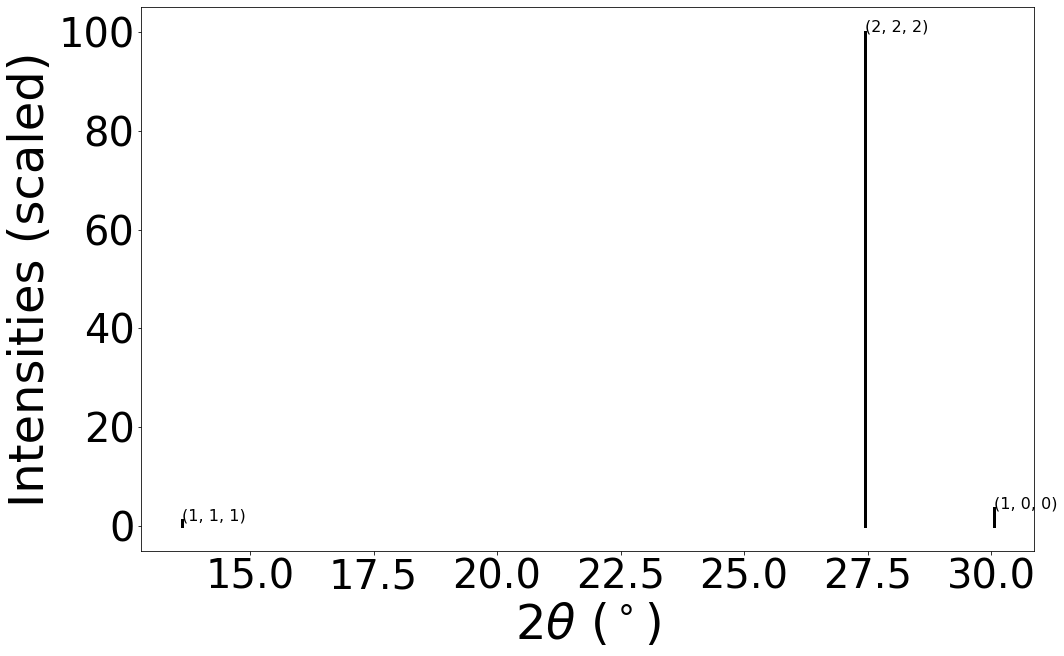

In [170]:
c = XRDCalculator()
c.show_plot(structure, two_theta_range = (0, 31))

Pour un rayonnement X incident Cu Kα de longueur d’onde λ = 1.54060 Å, on voit que les indices hkl des trois premiers pics du diffractogramme correspondant sont: 111, 222 et 100. En regardant le graphe, on peut estimer des intensités de 0, 50 et 2 % respectivement.